load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation


'denoised'

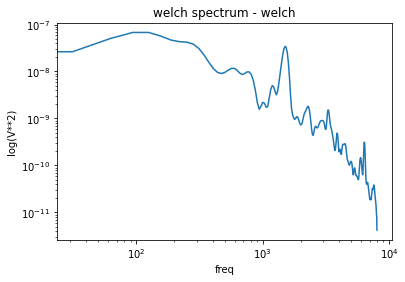

'original'

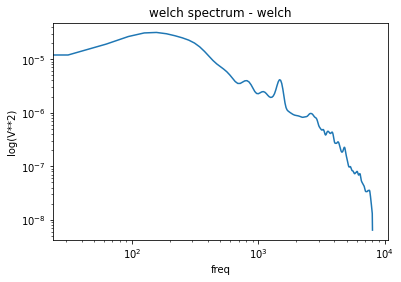

In [7]:
from IPython.display import display, Audio
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
#-- test
file_path = r'\dataset\min6dB\pump\id_02\normal\00000012.wav'
nnF = feature_extractor_pre_nnFilterDenoise(BASE_FOLDER)
nnF.set_hyperparamter(aggregation=np.mean)
nnF.create_from_wav(file_path)
wmf = nnF.get_wav_memory_file()
display('denoised')
display(Audio(data=wmf.channel[0],rate=wmf.srate))
psd = feature_extractor_welchPSD(BASE_FOLDER)
psd.create_from_wav(wmf)
psd.plot()
plt.show()
af = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
display('original')
display(Audio(data=af[0][0],rate=wmf.srate))
psd.create_from_wav(file_path)
psd.plot()
plt.show()


In [8]:
import librosa.output

librosa.output.write_wav('denoise.wav', wmf.channel[0], wmf.srate, norm=True)
wmf_n = memory_wave_file()
wmf_n.read_wavfile(BASE_FOLDER, file_path)
librosa.output.write_wav('noised.wav', wmf_n.channel[0], wmf.srate, norm=True)


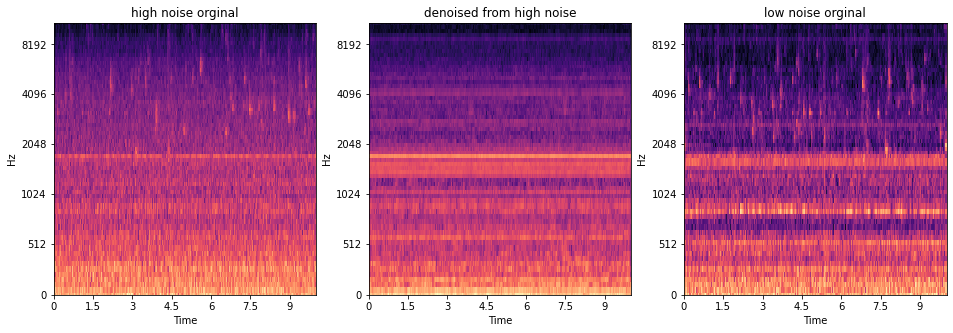

In [19]:
mel_d=feature_extractor_mel(BASE_FOLDER)
mel_n=feature_extractor_mel(BASE_FOLDER)
mel_nln=feature_extractor_mel(BASE_FOLDER)
mel_d.create_from_wav(wmf)
mel_n.create_from_wav(wmf_n)
mel_nln.create_from_wav(r'\dataset\6dB\pump\id_02\normal\00000012.wav')
plt.figure(figsize=(16,5))
plt.subplot(131)

mel_n.plot(False)
plt.title('high noise orginal')
plt.subplot(132)
mel_d.plot(False)
plt.title('denoised from high noise')
plt.subplot(133)
mel_nln.plot(False)
plt.title('low noise orginal')
plt.savefig('denoise_example.png',transparent=True, dpi=300) 